### Импорт библиотек и датасетов

In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [119]:
users = pd.read_csv('users.tsv',sep='\t')
history = pd.read_csv('history.tsv',sep='\t')
validate = pd.read_csv('validate.tsv',sep='\t')
validate_answers = pd.read_csv('validate_answers.tsv',sep='\t')

### Инфо

In [120]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27769 entries, 0 to 27768
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  27769 non-null  int64
 1   sex      27769 non-null  int64
 2   age      27769 non-null  int64
 3   city_id  27769 non-null  int64
dtypes: int64(4)
memory usage: 867.9 KB


,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4


In [121]:
history.info()
history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147857 entries, 0 to 1147856
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   hour       1147857 non-null  int64  
 1   cpm        1147857 non-null  float64
 2   publisher  1147857 non-null  int64  
 3   user_id    1147857 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 35.0 MB


,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148


In [122]:
validate.info()
validate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpm            1008 non-null   float64
 1   hour_start     1008 non-null   int64  
 2   hour_end       1008 non-null   int64  
 3   publishers     1008 non-null   object 
 4   audience_size  1008 non-null   int64  
 5   user_ids       1008 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.4+ KB


,cpm,hour_start,hour_end,publishers,audience_size,user_ids
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1..."
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3..."
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5..."
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524..."
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2..."


In [123]:
validate_answers.info()
validate_answers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   at_least_one    1008 non-null   float64
 1   at_least_two    1008 non-null   float64
 2   at_least_three  1008 non-null   float64
dtypes: float64(3)
memory usage: 23.8 KB


,at_least_one,at_least_two,at_least_three
0,0.0430,0.0152,0.0073
1,0.0130,0.0000,0.0000
2,0.0878,0.0135,0.0000
3,0.2295,0.1295,0.0727
4,0.3963,0.2785,0.2270


### Визуализация

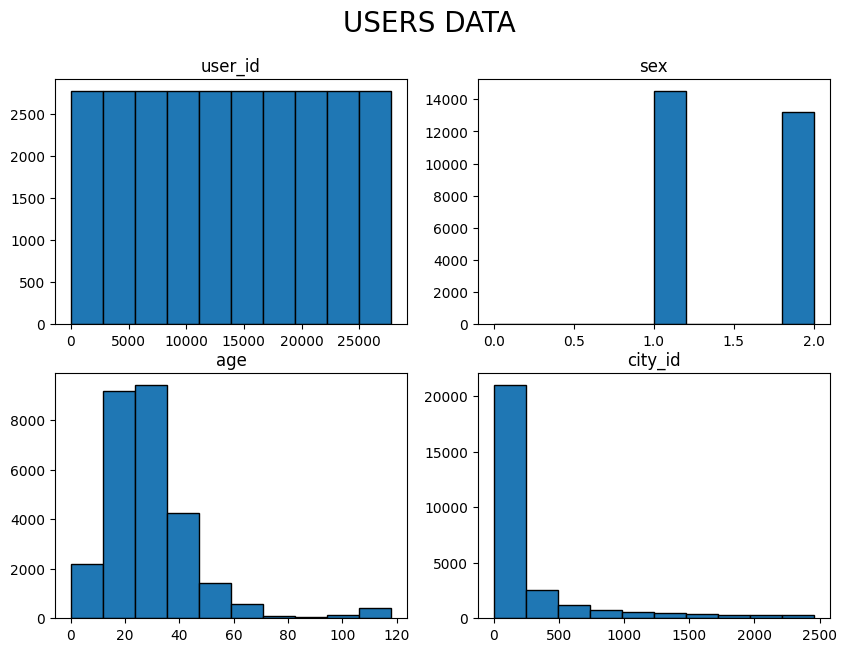

In [124]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('USERS DATA', fontsize = 20)

for i in range(len(users.columns)):
    plt.subplot(2,2,i+1)
    plt.title(users.columns[i])
    plt.hist(users[users.columns[i]], edgecolor='black')


plt.show()

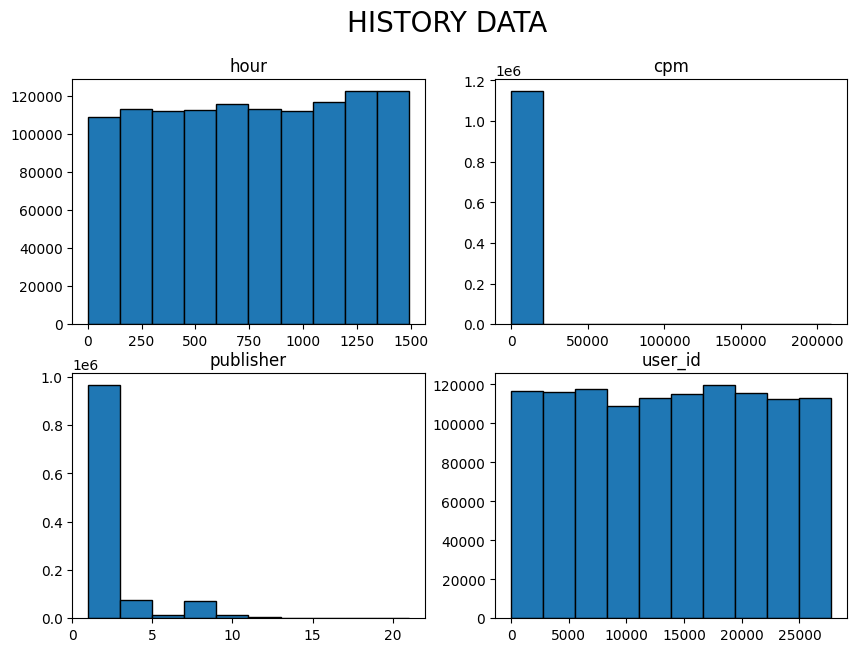

In [125]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('HISTORY DATA', fontsize = 20)

for i in range(len(history.columns)):
    plt.subplot(2,2,i+1)
    plt.title(history.columns[i])
    plt.hist(history[history.columns[i]], edgecolor='black')

plt.show()

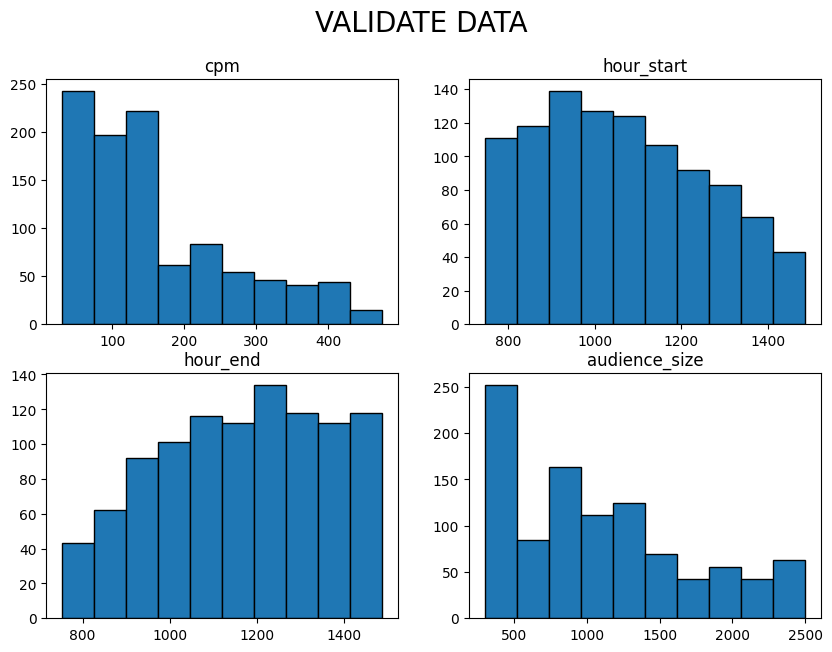

In [126]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.suptitle('VALIDATE DATA', fontsize = 20)

validate_vis = validate.drop(['publishers','user_ids'],axis=1) # Эти 2 колонки содержат списки, не уверен, как их визуализировать

for i in range(len(validate_vis.columns)):
    plt.subplot(2,2,i+1)
    plt.title(validate_vis.columns[i])
    plt.hist(validate_vis[validate_vis.columns[i]], edgecolor='black')

plt.show()

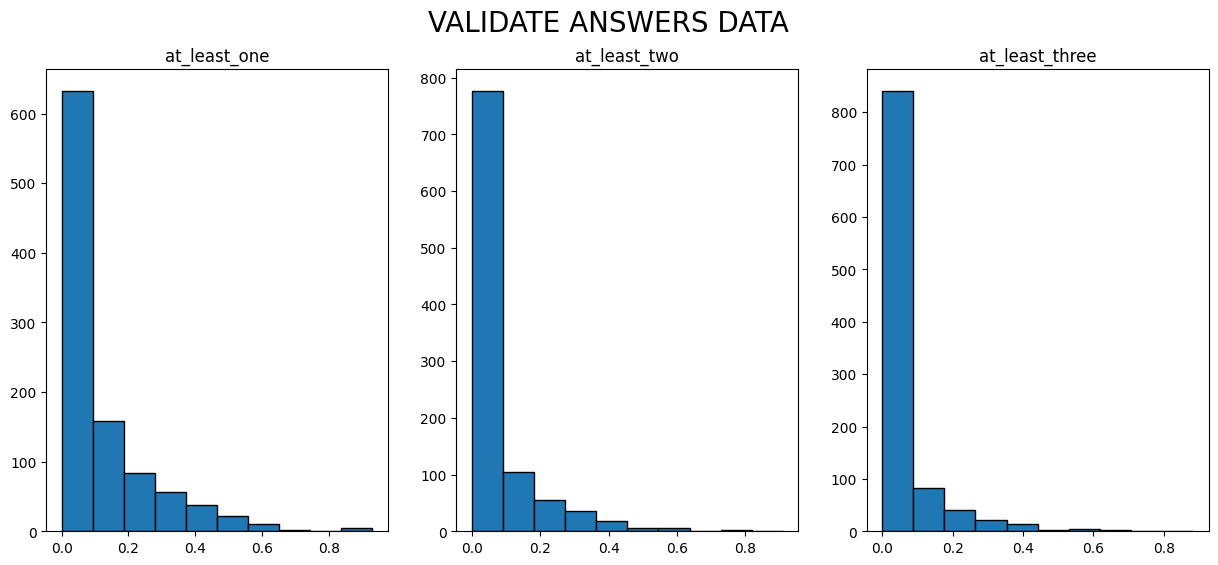

In [127]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.suptitle('VALIDATE ANSWERS DATA', fontsize = 20)

for i in range(len(validate_answers.columns)):
    plt.subplot(1,3,i+1)
    plt.title(validate_answers.columns[i])
    plt.hist(validate_answers[validate_answers.columns[i]], edgecolor='black')

plt.show()

### Корреляция validate и validate_answers

#### Выделение, преобразование и удаление признаков

Для удобства обозначений

In [128]:
X = validate.copy()
Y = validate_answers.copy()

Выделение

In [129]:
X.insert(len(X.columns),
         'delay',
         X['hour_end']-X['hour_start'])

In [130]:
# количество площадок - задаем ручками

publishers_amount = 21

In [131]:
# Вытаскиваем фичи по пользователям

users_features = pd.DataFrame(columns=[
    'no_sex_prop',
    'no_age_prop',
    'city_count',
    'history_cpm_mean',
    'adv_shown_freq'
])

user_publishers_props = pd.DataFrame(columns=range(1,publishers_amount+1)) 

for index, row in X.iterrows():
    
    users_ids = [ int(i) for i in row['user_ids'].split(',')]

    users_info = users[
        users['user_id'].isin(users_ids)
    ]

    # анализируем, что попадается ЦА
    users_history_shown = history[(history['user_id'].isin(users_ids)) & (history['hour'] < row['hour_start'])]


    users_features.loc[index] = [
        (users_info['sex'] == 0).sum() / row['audience_size'], # no_sex_prop
        (users_info['age'] == 0).sum() / row['audience_size'], # no_age_prop
        len(users_info['city_id'].unique()), # city_count
        users_history_shown['cpm'].mean(), # history_cpm_mean
        users_history_shown['publisher'].count() / len(users_ids) if len(users_ids)>0 else 0 # adv_shown_freq
    ]

    # пользовательские фичи по площадкам
    user_publishers_props.loc[index] = users_history_shown['publisher'].value_counts() / users_history_shown['publisher'].count()

user_publishers_props = user_publishers_props.fillna(0)

X = pd.concat([X, users_features], axis=1)


In [132]:
# вытаскиваем фичи по publishers

publishers_features = pd.DataFrame(columns=['p'+str(i) for i in range(1,publishers_amount+1)])

for index, row in X.iterrows():
    
    publishers = [int(i) for i in row['publishers'].split(',')]
    
    publishers_features.loc[index] = [int(i in publishers) for i in range(1,publishers_amount+1)]

publishers_features = user_publishers_props.values * publishers_features

X = pd.concat([X, publishers_features], axis=1)

Среднее время между показами

In [133]:
# Вытаскиваем фичи по пользователям
users_features['avg_time_between_ads'] = 0.0

for index, row in X.iterrows():
    users_ids = [int(i) for i in row['user_ids'].split(',')]
    users_history_shown = history[(history['user_id'].isin(users_ids)) & (history['hour'] < row['hour_start'])]
    
    avg_time_between_ads = 0.0
    for user_id, group in users_history_shown.groupby('user_id'):
        hours = sorted(group['hour'].unique())
        if len(hours) > 1:
            avg_time_between_ads += np.mean(np.diff(hours))
    avg_time_between_ads /= len(users_ids) if len(users_ids) > 0 else 1
    users_features.at[index, 'avg_time_between_ads'] = avg_time_between_ads

# Объединяем с основным датасетом X
X = pd.concat([X, users_features[['avg_time_between_ads']]], axis=1)

Количество уникальных объявлений в истории 

In [134]:
# # Вытаскиваем фичи по пользователям
# users_features['unique_ads_count'] = 0

# for index, row in X.iterrows():
#     users_ids = [int(i) for i in row['user_ids'].split(',')]
#     users_history_shown = history[(history['user_id'].isin(users_ids)) & (history['hour'] < row['hour_start'])]
    
#     unique_ads_count = users_history_shown['cpm'].nunique()
#     users_features.at[index, 'unique_ads_count'] = unique_ads_count

# # Объединяем с основным датасетом X
# X = pd.concat([X, users_features[['unique_ads_count']]], axis=1)

Частота показов на конкретной площадке

In [135]:
# Вытаскиваем фичи по пользователям
publishers_amount = 21
platform_specific_freq = pd.DataFrame(0, index=X.index, columns=[f'platform_freq_{i}' for i in range(1, publishers_amount + 1)])

for index, row in X.iterrows():
    users_ids = [int(i) for i in row['user_ids'].split(',')]
    users_history_shown = history[(history['user_id'].isin(users_ids)) & (history['hour'] < row['hour_start'])]
    
    total_shows = users_history_shown.shape[0]
    if total_shows > 0:
        platform_counts = users_history_shown['publisher'].value_counts(normalize=True)
        for platform, freq in platform_counts.items():
            platform_specific_freq.at[index, f'platform_freq_{platform}'] = freq

# Объединяем с основным датасетом X
X = pd.concat([X, platform_specific_freq], axis=1)

/var/folders/m6/zg0nj7_90zsbrjs7nrj33m9c0000gn/T/ipykernel_44930/4076366526.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5798026912469691' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  platform_specific_freq.at[index, f'platform_freq_{platform}'] = freq
/var/folders/m6/zg0nj7_90zsbrjs7nrj33m9c0000gn/T/ipykernel_44930/4076366526.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2518925722324023' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  platform_specific_freq.at[index, f'platform_freq_{platform}'] = freq
/var/folders/m6/zg0nj7_90zsbrjs7nrj33m9c0000gn/T/ipykernel_44930/4076366526.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.076517

Доля показов в пиковое время

In [136]:
# # Вытаскиваем фичи по пользователям
# users_features['peak_hour_ratio'] = 0.0

# for index, row in X.iterrows():
#     users_ids = [int(i) for i in row['user_ids'].split(',')]
#     users_history_shown = history[(history['user_id'].isin(users_ids)) & (history['hour'] < row['hour_start'])]
    
#     peak_hours = users_history_shown[(users_history_shown['hour'] >= 18) & (users_history_shown['hour'] <= 22)]
#     peak_hour_ratio = peak_hours.shape[0] / users_history_shown.shape[0] if users_history_shown.shape[0] > 0 else 0
#     users_features.at[index, 'peak_hour_ratio'] = peak_hour_ratio

# # Объединяем с основным датасетом X
# X = pd.concat([X, users_features[['peak_hour_ratio']]], axis=1)

Коэффициент конкуренции на площадке

In [137]:
# # Вытаскиваем фичи по пользователям
# users_features['competition_score'] = 0.0

# for index, row in X.iterrows():
#     publishers = [int(i) for i in row['publishers'].split(',')]
#     competition_score = 0.0
    
#     for publisher in publishers:
#         publisher_data = history[history['publisher'] == publisher]
#         if publisher_data.shape[0] > 0:
#             competition_score += publisher_data.shape[0] / publisher_data['user_id'].nunique()
#     competition_score /= len(publishers) if len(publishers) > 0 else 1
#     users_features.at[index, 'competition_score'] = competition_score

# # Объединяем с основным датасетом X
# X = pd.concat([X, users_features[['competition_score']]], axis=1)

Историческая активность пользователя

In [138]:
# # Вытаскиваем фичи по пользователям
# users_features['user_activity_score'] = 0

# for index, row in X.iterrows():
#     users_ids = [int(i) for i in row['user_ids'].split(',')]
#     users_history_shown = history[(history['user_id'].isin(users_ids)) & (history['hour'] < row['hour_start'])]
    
#     user_activity_score = users_history_shown['hour'].nunique()
#     users_features.at[index, 'user_activity_score'] = user_activity_score

# # Объединяем с основным датасетом X
# X = pd.concat([X, users_features[['user_activity_score']]], axis=1)

Возрастная категория – плохо

In [139]:
# # Вытаскиваем фичи по пользователям
# users_features['age_group_unknown'] = 0
# users_features['age_group_18_24'] = 0
# users_features['age_group_25_34'] = 0
# users_features['age_group_35_44'] = 0
# users_features['age_group_45_54'] = 0
# users_features['age_group_55_plus'] = 0

# for index, row in X.iterrows():
#     users_ids = [int(i) for i in row['user_ids'].split(',')]
#     users_info = users[users['user_id'].isin(users_ids)]
    
#     age_groups = pd.cut(
#         users_info['age'],
#         bins=[-1, 18, 25, 35, 45, 55, 100],
#         labels=['unknown', '18_24', '25_34', '35_44', '45_54', '55_plus'],
#         right=False
#     ).value_counts(normalize=True)
    
#     for group, freq in age_groups.items():
#         users_features.at[index, f'age_group_{group}'] = freq

# # Объединяем с основным датасетом X
# age_group_columns = [col for col in users_features.columns if col.startswith('age_group_')]
# X = pd.concat([X, users_features[age_group_columns]], axis=1)

Городская активность

In [140]:
# # Вытаскиваем фичи по пользователям
# users_features['city_activity_score'] = 0.0

# for index, row in X.iterrows():
#     users_ids = [int(i) for i in row['user_ids'].split(',')]
#     users_info = users[users['user_id'].isin(users_ids)]
    
#     city_counts = users_info['city_id'].value_counts(normalize=True)
#     city_activity_score = city_counts.sum() if not city_counts.empty else 0
#     users_features.at[index, 'city_activity_score'] = city_activity_score

# # Объединяем с основным датасетом X
# X = pd.concat([X, users_features[['city_activity_score']]], axis=1)

Скорость изменения CPM

In [141]:
# # Вытаскиваем фичи по пользователям
# users_features['cpm_trend'] = 0.0

# for index, row in X.iterrows():
#     users_ids = [int(i) for i in row['user_ids'].split(',')]
#     users_history_shown = history[(history['user_id'].isin(users_ids)) & (history['hour'] < row['hour_start'])]
    
#     cpm_trend = 0.0
#     for user_id, group in users_history_shown.groupby('user_id'):
#         if len(group) > 1:
#             x = np.arange(len(group))
#             y = group['cpm'].values
#             slope, _ = np.polyfit(x, y, 1)
#             cpm_trend += slope
#     cpm_trend /= len(users_ids) if len(users_ids) > 0 else 1
#     users_features.at[index, 'cpm_trend'] = cpm_trend

# # Объединяем с основным датасетом X
# X = pd.concat([X, users_features[['cpm_trend']]], axis=1)

Сессионная активность 

In [143]:
# Вытаскиваем фичи по пользователям
users_features['session_count'] = 0
users_features['avg_session_duration'] = 0.0
users_features['ads_per_session'] = 0.0

for index, row in X.iterrows():
    users_ids = [int(i) for i in row['user_ids'].split(',')]
    users_history_shown = history[(history['user_id'].isin(users_ids)) & (history['hour'] < row['hour_start'])]
    
    session_count = 0
    total_duration = 0
    ads_per_session = 0
    for user_id, group in users_history_shown.groupby('user_id'):
        group = group.sort_values('hour')
        sessions = []
        current_session = [group['hour'].iloc[0]]
        
        for hour in group['hour'].iloc[1:]:
            if hour - current_session[-1] > 6:
                sessions.append(current_session)
                current_session = [hour]
            else:
                current_session.append(hour)
        sessions.append(current_session)
        
        session_count += len(sessions)
        total_duration += sum(max(session) - min(session) for session in sessions)
        ads_per_session += len(group) / len(sessions) if sessions else 0
    
    users_features.at[index, 'session_count'] = session_count
    users_features.at[index, 'avg_session_duration'] = total_duration / session_count if session_count > 0 else 0
    users_features.at[index, 'ads_per_session'] = ads_per_session / session_count if session_count > 0 else 0

# Объединяем с основным датасетом X
session_columns = ['session_count', 'avg_session_duration', 'ads_per_session']
X = pd.concat([X, users_features[session_columns]], axis=1)
# X = pd.concat([X, users_features[avg_session_duration]], axis=1)

Преобразование

In [ ]:
for column in X.columns: 
    if column in ['publishers', 'user_ids']:
        continue
    X[column] = (X[column] - X[column].mean()) / X[column].std() 

In [ ]:
# возможность для разделения главными компонентами

from sklearn.decomposition import PCA

X[['pca1','pca2']] = PCA(2).fit_transform(X[['city_count', 'audience_size']])

In [ ]:
X['publishers_count'] = X['publishers'].apply(lambda s: s.count(',')+1)

Удаление

In [ ]:
# Список колонок, которые нужно исключить
columns_to_exclude = [
    'hour_end',
    'hour_start',
    'publishers',
    'user_ids',  # Удаляем, но у нас есть backup
    'city_count',
    'audience_size',
    'publishers_count',
    'no_sex_prop'
] + [('p' + str(i)) for i in range(3, 22)]

# Создаем новый датасет, исключая ненужные колонки
columns_to_keep = [col for col in X.columns if col not in columns_to_exclude]
X_filtered = X[columns_to_keep]

# Объединяем фильтрованный X с целевыми переменными Y для анализа корреляции
df_filtered = pd.concat([X_filtered, Y], axis=1)

Формируем общий датафрейм для удобства

In [ ]:
df = pd.concat([X, Y], axis = 1)

#### Матрицы

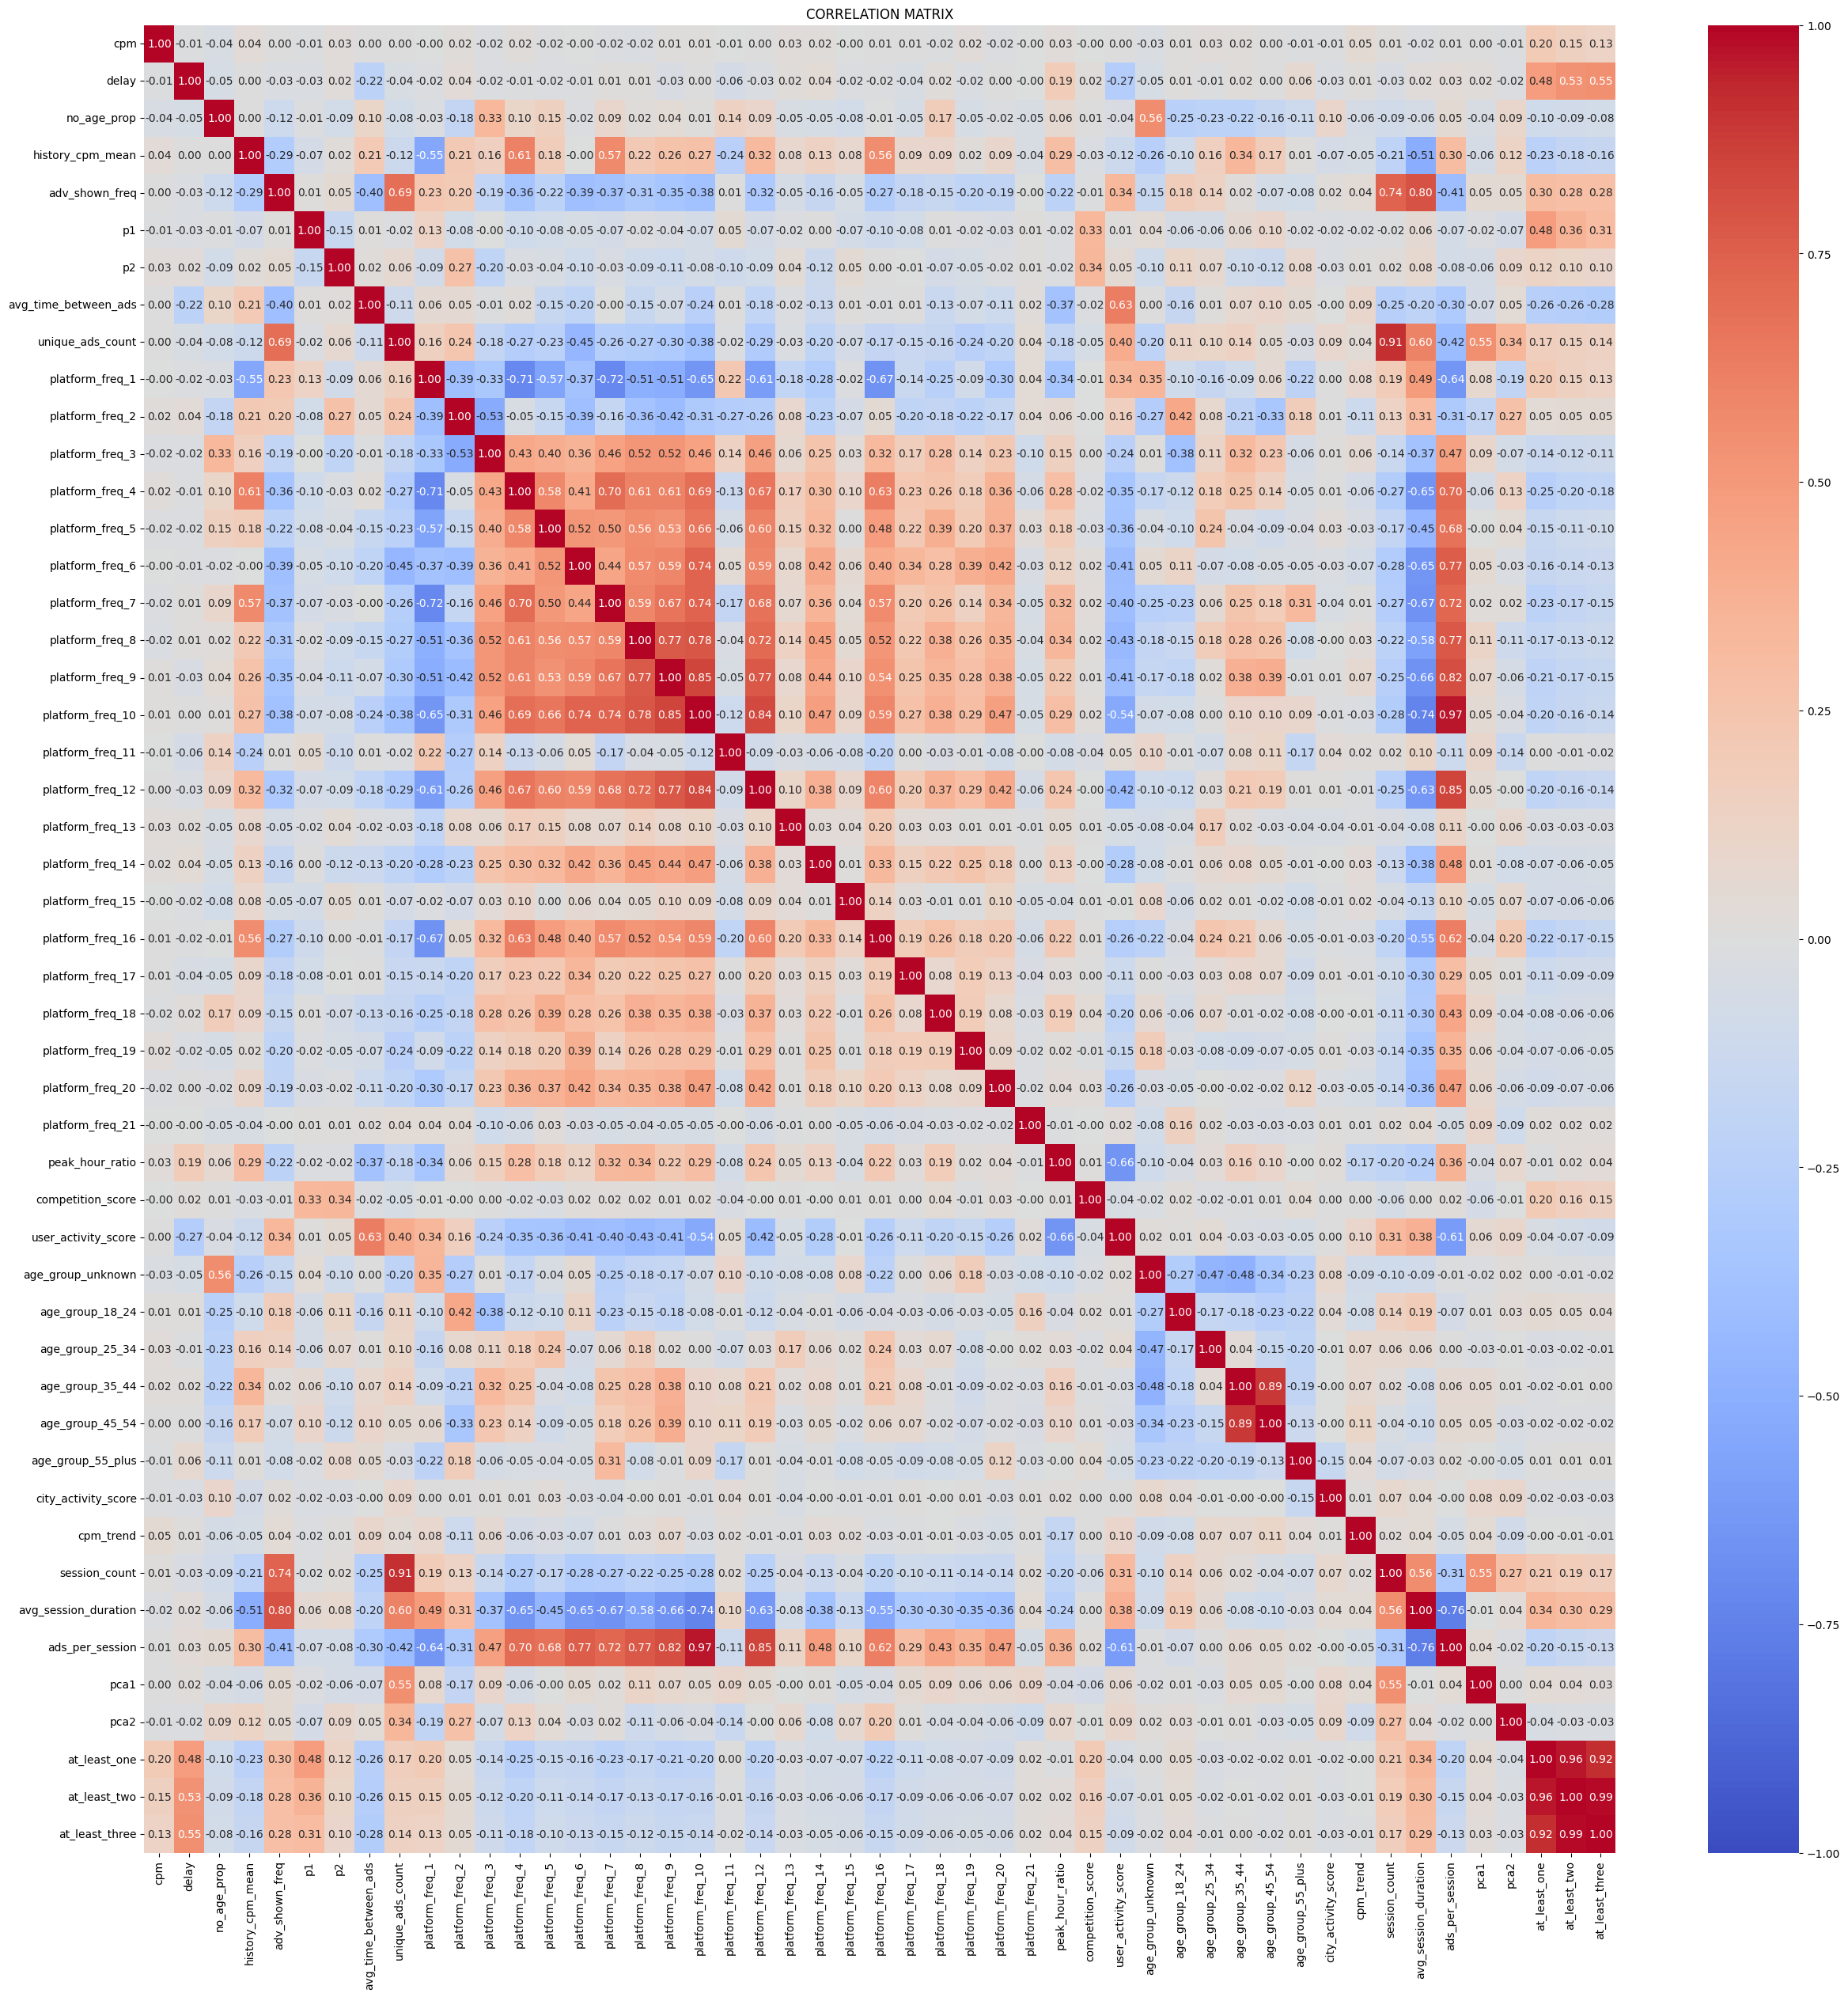

In [ ]:
# Настройка графика
f = plt.figure(facecolor='white')
f.set_figwidth(30)
f.set_figheight(30)

# Вычисление корреляционной матрицы
correlation_matrix = df_filtered.corr()

# Построение тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('CORRELATION MATRIX')
plt.show()

In [ ]:
# Вывод корреляции целевых переменных с остальными признаками
target_columns = ['at_least_one', 'at_least_two', 'at_least_three']
correlation_with_targets = correlation_matrix[target_columns].drop(target_columns)

# Вывод корреляции в виде списка
for target in target_columns:
    print(f"Корреляция с {target}:")
    print(correlation_with_targets[target].sort_values(ascending=False))
    print("\n")

Корреляция с at_least_one:
delay                   0.480316
p1                      0.479397
avg_session_duration    0.341036
adv_shown_freq          0.302631
session_count           0.212167
platform_freq_1         0.200930
cpm                     0.199448
competition_score       0.195796
unique_ads_count        0.170596
p2                      0.117198
age_group_18_24         0.051843
platform_freq_2         0.046295
pca1                    0.041220
platform_freq_21        0.021558
age_group_55_plus       0.006769
platform_freq_11        0.000610
age_group_unknown       0.000108
cpm_trend              -0.003619
peak_hour_ratio        -0.008238
city_activity_score    -0.018835
age_group_35_44        -0.021809
age_group_45_54        -0.022344
platform_freq_13       -0.030894
age_group_25_34        -0.032248
pca2                   -0.039795
user_activity_score    -0.040167
platform_freq_19       -0.069620
platform_freq_14       -0.070353
platform_freq_15       -0.073827
platform_freq_18

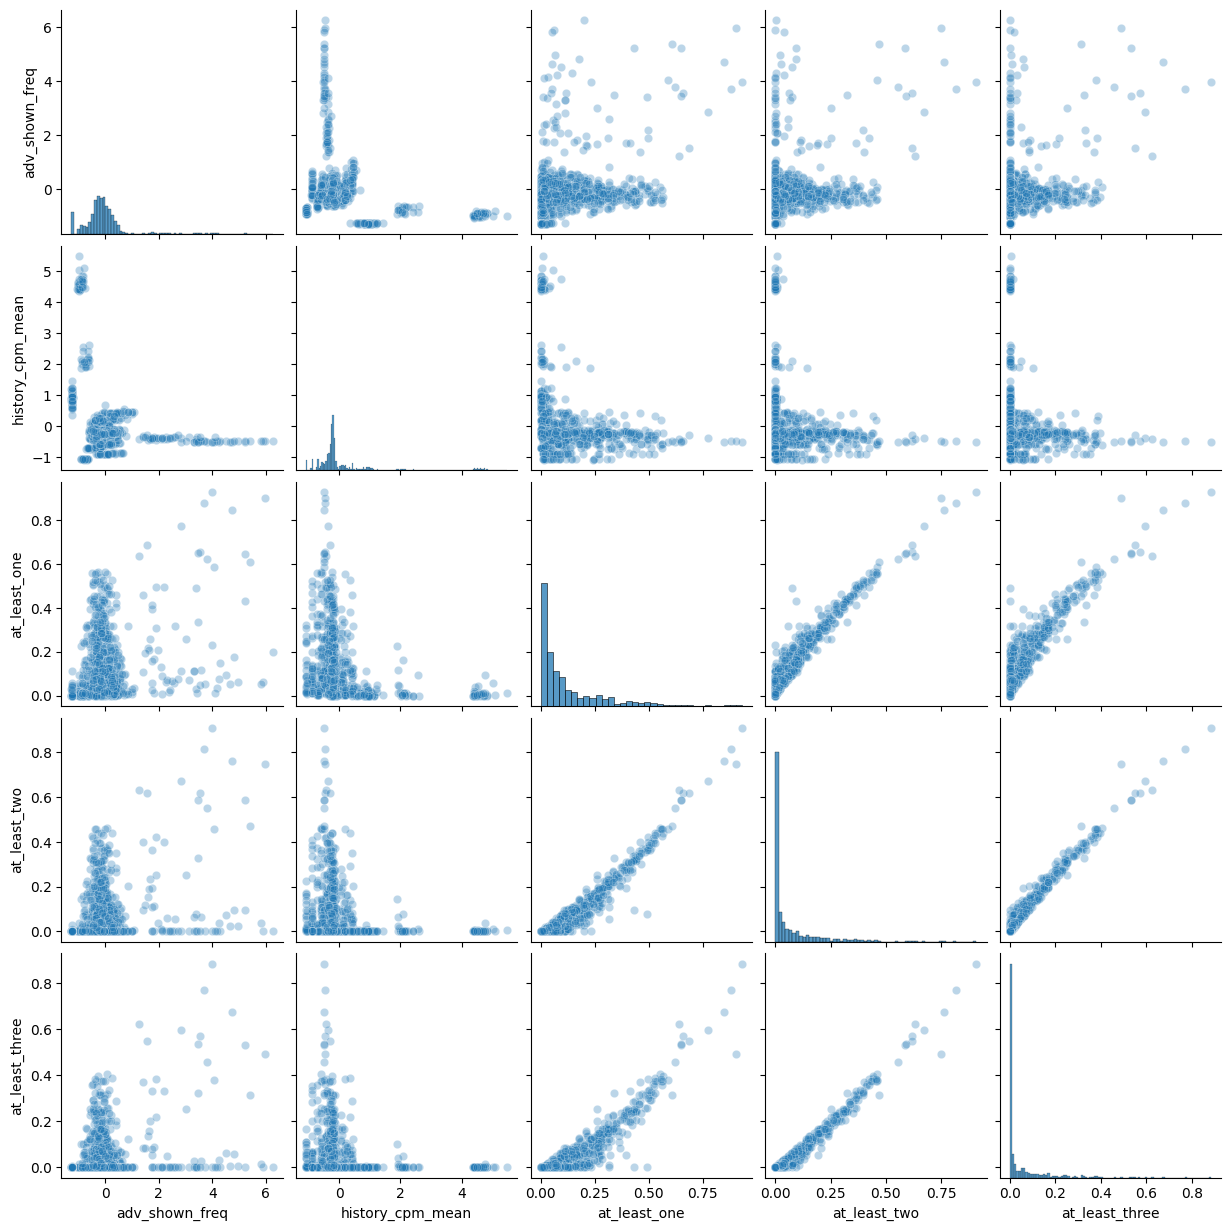

In [ ]:
pp = sns.pairplot(df[['adv_shown_freq', 'history_cpm_mean',
                      'at_least_one', 'at_least_two', 'at_least_three']],
             #x_vars = ['p1', 'history_cpm_mean'],
             #y_vars = ['at_least_one', 'at_least_two', 'at_least_three'],
             plot_kws = dict(alpha = 0.3),
             height = 2.5)
#pp.map(sns.regplot, scatter = False)
plt.show()

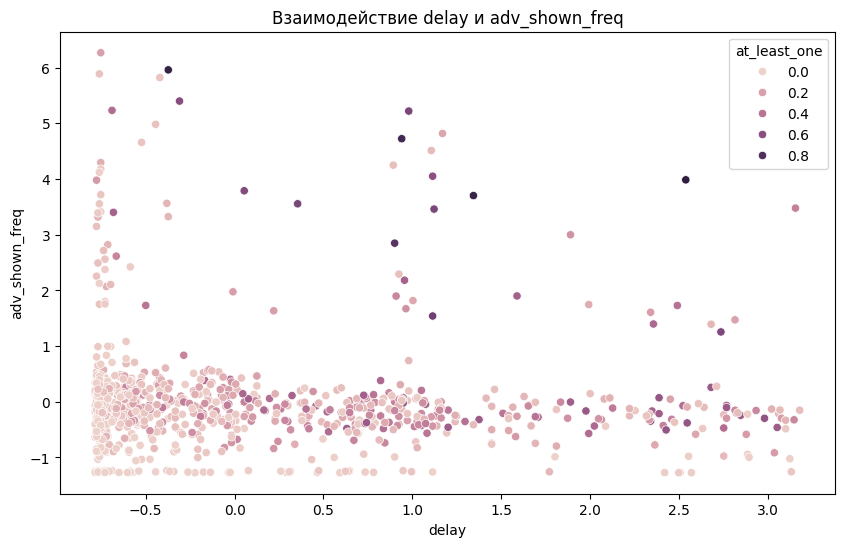

Корреляция между delay и adv_shown_freq: -0.0273


In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Исследуем взаимодействие delay и adv_shown_freq
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_filtered, x='delay', y='adv_shown_freq', hue=Y['at_least_one'])
plt.title('Взаимодействие delay и adv_shown_freq')
plt.show()

# Корреляция между delay и adv_shown_freq
correlation_delay_adv = X_filtered[['delay', 'adv_shown_freq']].corr().iloc[0, 1]
print(f"Корреляция между delay и adv_shown_freq: {correlation_delay_adv:.4f}")

In [146]:
# Создаем новую фичу: произведение delay и adv_shown_freq
X_filtered['delay_adv_interaction'] = X_filtered['delay'] * X_filtered['adv_shown_freq']

# Проверяем корреляцию с целевыми переменными
correlation_delay_adv_interaction = X_filtered['delay_adv_interaction'].corr(Y['at_least_one'])
print(f"Корреляция delay_adv_interaction с at_least_one: {correlation_delay_adv_interaction:.4f}")

Корреляция delay_adv_interaction с at_least_one: 0.1522


In [147]:
# Создаем новую фичу: общее время активности пользователя
X_filtered['total_session_time'] = X_filtered['session_count'] * X_filtered['avg_session_duration']

# Проверяем корреляцию с целевыми переменными
correlation_total_session_time = X_filtered['total_session_time'].corr(Y['at_least_one'])
print(f"Корреляция total_session_time с at_least_one: {correlation_total_session_time:.4f}")

Корреляция total_session_time с at_least_one: 0.1414


In [154]:
# Выбираем площадки с сильной корреляцией
platform_columns = [col for col in X_filtered.columns if col.startswith('platform_freq_')]
platform_correlations = X_filtered[platform_columns].corrwith(Y['at_least_one'])

# Выводим площадки с самой сильной положительной и отрицательной корреляцией
top_positive_platforms = platform_correlations.nlargest(5)
top_negative_platforms = platform_correlations.nsmallest(5)
print("Топ площадок с положительной корреляцией:")
print(top_positive_platforms)
print("\nТоп площадок с отрицательной корреляцией:")
print(top_negative_platforms)

Топ площадок с положительной корреляцией:
platform_freq_1                  0.200930
platform_freq_1_effectiveness    0.200930
platform_freq_2                  0.046295
platform_freq_2_effectiveness    0.046295
platform_freq_21                 0.021558
dtype: float64

Топ площадок с отрицательной корреляцией:
platform_freq_4                 -0.251364
platform_freq_4_effectiveness   -0.251364
platform_freq_7_effectiveness   -0.225561
platform_freq_7                 -0.225561
platform_freq_16                -0.220893
dtype: float64


In [163]:
# Создаем новую фичу: остаточное время до следующего показа
X_filtered['remaining_time_to_next_ad'] = X_filtered['delay'] - X_filtered['avg_time_between_ads']

# Заполняем NaN (если avg_time_between_ads > delay)
X_filtered['remaining_time_to_next_ad'] = X_filtered['remaining_time_to_next_ad'].clip(lower=0)

# Проверяем корреляцию с целевыми переменными
correlation_remaining_time = X_filtered['remaining_time_to_next_ad'].corr(Y['at_least_one'])
print(f"Корреляция remaining_time_to_next_ad с at_least_one: {correlation_remaining_time:.4f}")

Корреляция remaining_time_to_next_ad с at_least_one: 0.4318


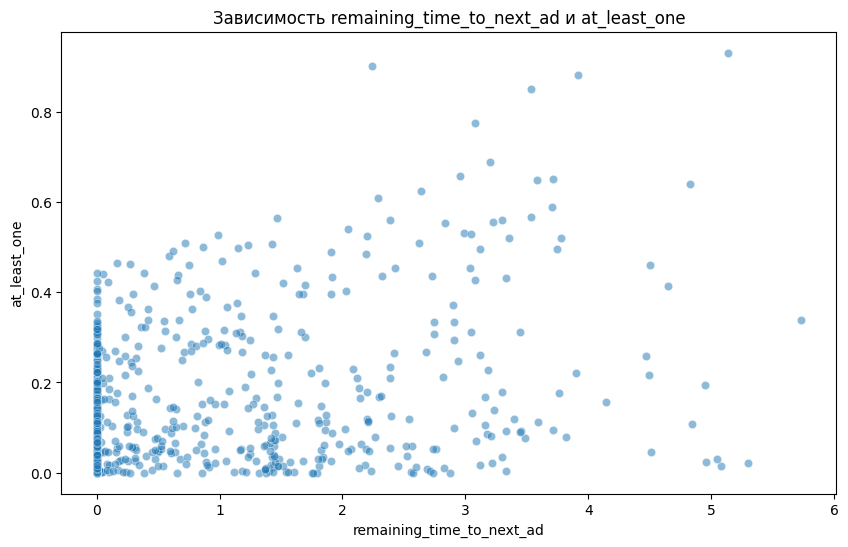

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация зависимости remaining_time_to_next_ad и at_least_one
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_filtered, x='remaining_time_to_next_ad', y=Y['at_least_one'], alpha=0.5)
plt.title('Зависимость remaining_time_to_next_ad и at_least_one')
plt.xlabel('remaining_time_to_next_ad')
plt.ylabel('at_least_one')
plt.show()

### Черновая модель

In [ ]:
X = X.drop(['publishers','user_ids'], axis=1)

In [ ]:
from metrics import get_smoothed_mean_log_accuracy_ratio, get_smoothed_log_mape_column_value

def get_metric_for_ndarray(y_true, y_predicted):
    ans = get_smoothed_mean_log_accuracy_ratio(
        pd.DataFrame((y_true>0) * y_true, columns=validate_answers.columns),
        pd.DataFrame((y_predicted>0) * y_predicted, columns=validate_answers.columns)
    )
    return ans

def get_metric_for_one(y_true, y_predicted):
    return get_smoothed_log_mape_column_value((y_predicted>0)*y_predicted, (y_true>0)*y_true, 0.005)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
X_train = X_train.fillna(0)
normalizer_x = StandardScaler().fit(X_train)
X_train = normalizer_x.transform(X_train)


In [ ]:
from sklearn.linear_model import MultiTaskElasticNet
# from sklearn.svm import SVR

# Импорт класса GridSearchCV из модуля model_selection scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Создание словаря, содержащего потенциальные значения альфа
param_grid_en = {
    'alpha' : [0.001, 0.005, 0.008, 0.01, 0.03, 0.05, 0.1, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 2, 3, 5, 8, 10, 20, 50, 100],
    'l1_ratio' : [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 0.99, 0.999, 1],
    'max_iter' : [10000]
}

param_grid_svm = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : [1, 2, 3, 4, 5],
    'gamma' : ['scale', 'auto'],
    'epsilon' : [1e-5, 0.001, 0.01, 0.1],
    'coef0' : [0, 1],
    'tol' : [1e-5, 1e-3, 0.1],
}

# Передача в GridSearchCV модели, потенциальных альфа-значений,
# метрики качества
model = GridSearchCV(MultiTaskElasticNet(),
                     param_grid_en,
                     scoring=make_scorer(get_metric_for_ndarray, greater_is_better=False),
                     #scoring='explained_variance',
                     cv=10)

res = model.fit(X_train, Y_train.values)
#res = model.fit(X_train, Y_train.values[:,0])

# обучение модели 
print('Лучшее значение alpha:', res.best_params_)

# Вывод метрики качества
print('Метрика качества:', res.best_score_)

Лучшее значение alpha: {'alpha': 0.01, 'l1_ratio': 0.3, 'max_iter': 10000}
Метрика качества: -121.876


Переназначаем индексы для корректной работы метрики

In [ ]:
Y_train = Y_train.reset_index(drop=True)

In [ ]:
preds = pd.DataFrame(model.predict(X_train),columns=validate_answers.columns)
#preds = pd.DataFrame(np.array([model.predict(X_train), model2.predict(X_train), model3.predict(X_train)]).T,columns=validate_answers.columns)
preds = (preds>0)*preds

print('train result', get_smoothed_mean_log_accuracy_ratio( Y_train, preds))

train result 117.58


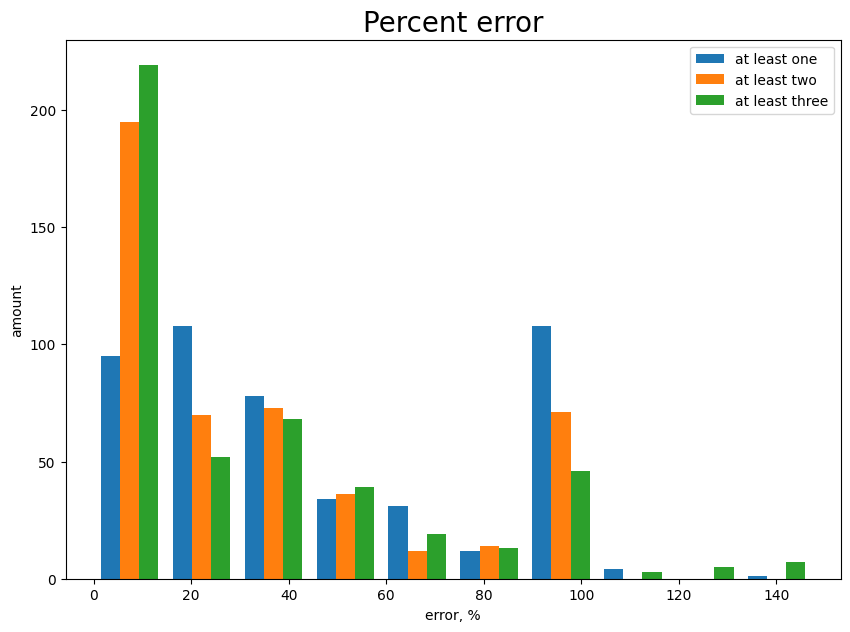

In [ ]:
f = plt.figure(facecolor='white')
f.set_figwidth(10)
f.set_figheight(7)

plt.title('Percent error', fontsize = 20)
plt.xlabel('error, %')
plt.ylabel('amount')

ae = (Y_train - preds).abs()
pe = ae/(Y_train+0.0001)*100
plt.hist(pe[((pe<150)).all(axis=1)], bins=10)
plt.legend(['at least one', 'at least two', 'at least three'])
plt.show()

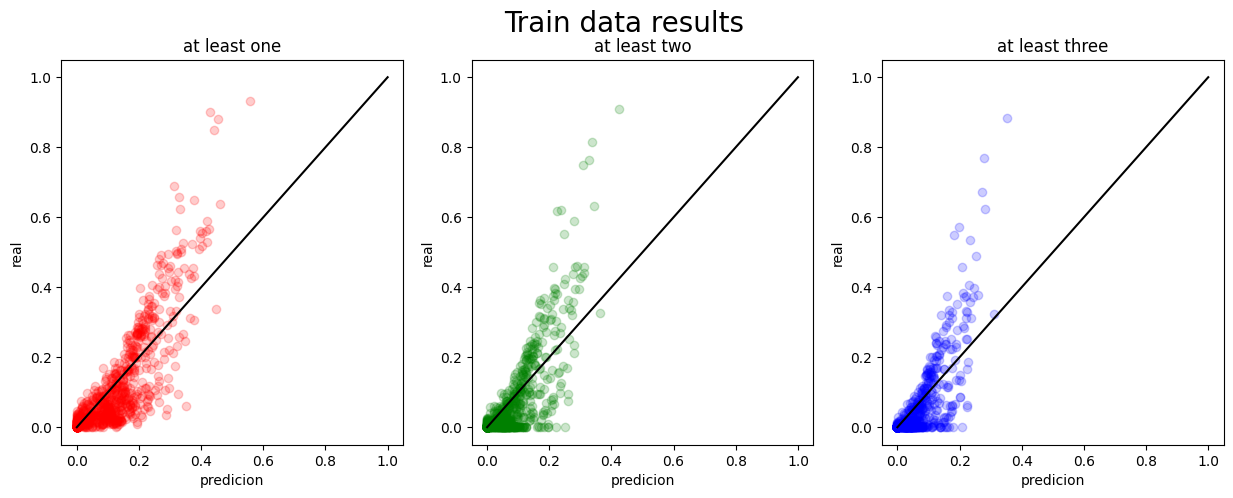

In [ ]:
f = plt.figure(facecolor='white')
f.set_figwidth(15)
f.set_figheight(5)

plt.suptitle('Train data results', fontsize = 20)
plt.subplot(1,3,1)
plt.scatter(preds['at_least_one'], Y_train['at_least_one'], color='r', alpha=0.2,)
plt.title('at least one')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,2)
plt.scatter(preds['at_least_two'], Y_train['at_least_two'], color='g', alpha=0.2)
plt.title('at least two')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,3)
plt.scatter(preds['at_least_three'], Y_train['at_least_three'], color='b', alpha=0.2)
plt.title('at least three')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.show()

In [ ]:
X_test_n = normalizer_x.transform(X_test.fillna(0))

preds_test = pd.DataFrame(model.predict(X_test_n),columns=validate_answers.columns)
# preds_test = pd.DataFrame(np.array([model.predict(X_test_n), model2.predict(X_test_n), model3.predict(X_test_n)]).T,columns=validate_answers.columns)
preds_test = (preds_test>0)*preds_test
Y_test = Y_test.reset_index(drop=True)

print('test result:',get_smoothed_mean_log_accuracy_ratio(Y_test, preds_test))

test result: 113.76


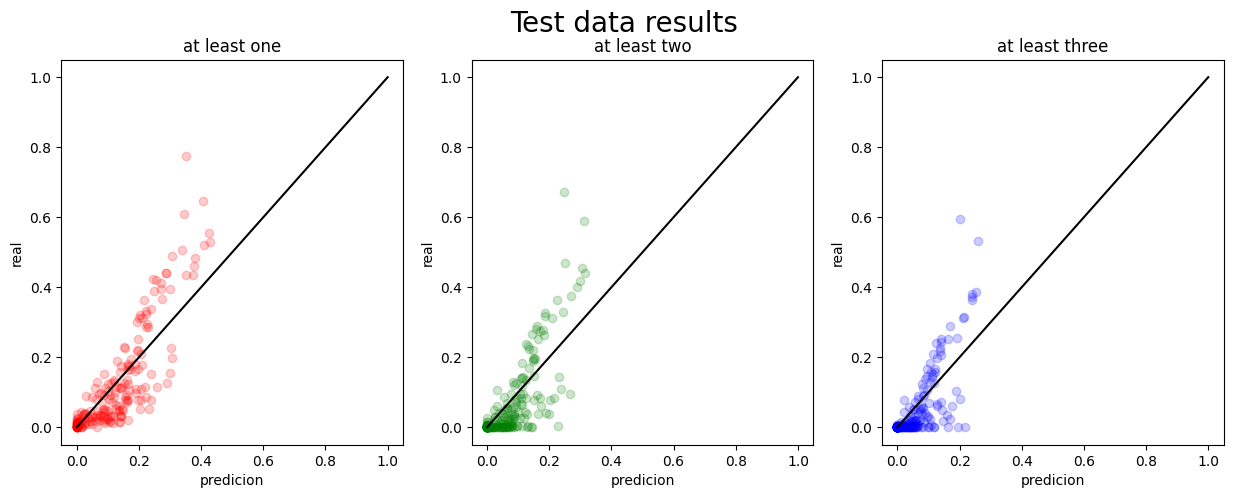

In [ ]:
f = plt.figure(facecolor='white')
f.set_figwidth(15)
f.set_figheight(5)

plt.suptitle('Test data results', fontsize = 20)

plt.subplot(1,3,1)
plt.scatter(preds_test['at_least_one'], Y_test['at_least_one'], color='r', alpha=0.2,)
plt.title('at least one')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,2)
plt.scatter(preds_test['at_least_two'], Y_test['at_least_two'], color='g', alpha=0.2)
plt.title('at least two')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.subplot(1,3,3)
plt.scatter(preds_test['at_least_three'], Y_test['at_least_three'], color='b', alpha=0.2)
plt.title('at least three')
plt.plot([0,1],[0,1], 'k')
plt.xlabel('predicion')
plt.ylabel('real')

plt.show()

In [ ]:
model.best_estimator_.coef_

array([[ 2.68224241e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.91047496e-02,  0.00000000e+00,
        -3.00002485e-03,  2.45265931e-03, -1.32927667e-02,
         2.23898384e-02,  6.95391118e-02,  2.10849826e-02,
         8.26809248e-04, -3.72668592e-03, -1.38151774e-04,
         0.00000000e+00,  7.06881476e-03, -1.40411632e-03,
         0.00000000e+00,  0.00000000e+00, -2.59122498e-03,
         0.00000000e+00, -2.74887992e-03, -4.73168667e-03,
         3.68559013e-03,  3.21093612e-03,  0.00000000e+00,
         0.00000000e+00,  3.44516037e-03,  0.00000000e+00,
         0.00000000e+00, -7.38554836e-03, -9.51678279e-05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.17437432e-03,  0.00000000e+00,
        -5.25836993e-04,  0.00000000e+00, -1.48877686e-03,
        -8.55868775e-04,  0.00000000e+00, -1.62263410e-0

# Разделение данных и масштабирование

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
numerical_features = X_train.select_dtypes(include=np.number).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [ ]:
models = {
    'at_least_one': {
        'lr': LinearRegression(),
        'rf': RandomForestRegressor(n_estimators=100, random_state=42)
                },
    'at_least_two': {
        'lr': LinearRegression(),
        'rf': RandomForestRegressor(n_estimators=100, random_state=42)
    },
    'at_least_three': {
        'lr': LinearRegression(),
        'rf': RandomForestRegressor(n_estimators=100, random_state=42)
    }
}

In [ ]:
predictions = {}  # Изменили название на predictions, т.к. это регрессия

for target in ['at_least_one', 'at_least_two', 'at_least_three']:
    predictions[target] = {}
    for model_name, model in models[target].items():
        model.fit(X_train, y_train[target])
        predictions[target][model_name] = model.predict(X_test)

In [ ]:
weights = {  # Пример весов (нужно подобрать оптимальные значения)
    'lr': 0.5,
    'rf': 0.5
}


In [144]:
ensemble_predictions_weighted = {}

for target in ['at_least_one', 'at_least_two', 'at_least_three']:
    ensemble_predictions_weighted[target] = (
        weights['lr'] * predictions[target]['lr'] +
        weights['rf'] * predictions[target]['rf']
    )

    # Оцениваем качество ансамбля (используем метрики регрессии)
    ensemble_mse_weighted = mean_squared_error(y_test[target], ensemble_predictions_weighted[target])
    ensemble_r2_weighted = r2_score(y_test[target], ensemble_predictions_weighted[target])

    print(f"Ensemble - {target}:")
    print(f"MSE: {ensemble_mse_weighted}")
    print(f"R-squared: {ensemble_r2_weighted}")


Ensemble - at_least_one:
MSE: 0.0035237931897525833
R-squared: 0.8132831906861708
Ensemble - at_least_two:
MSE: 0.0025902506299293197
R-squared: 0.7758088432977672
Ensemble - at_least_three:
MSE: 0.0018203748094238253
R-squared: 0.7664874419941821


In [ ]:
ensemble_predictions_stacked = {}

for target in ['at_least_one', 'at_least_two', 'at_least_three']:
    meta_features = np.column_stack((
        predictions[target]['lr'],
        predictions[target]['rf']
        ))

    meta_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Мета-модель
    meta_model.fit(meta_features, y_test[target])

    ensemble_predictions_stacked[target] = meta_model.predict(meta_features)

    ensemble_mse_stacked = mean_squared_error(y_test[target], ensemble_predictions_stacked[target])
    ensemble_r2_stacked = r2_score(y_test[target], ensemble_predictions_stacked[target])

    print(f"Ensemble (Stacking) - {target}:")
    print(f"MSE: {ensemble_mse_stacked}")
    print(f"R-squared: {ensemble_r2_stacked}")

Ensemble (Stacking) - at_least_one:
MSE: 0.00031621283563861393
R-squared: 0.9832446887330906
Ensemble (Stacking) - at_least_two:
MSE: 0.00032043631055940654
R-squared: 0.9722656231471819
Ensemble (Stacking) - at_least_three:
MSE: 0.00015553158963366347
R-squared: 0.9800488453487426


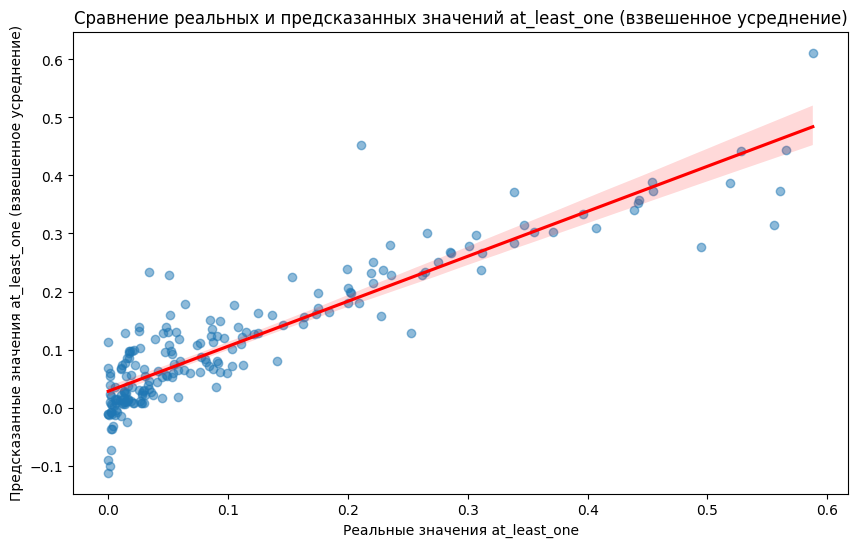

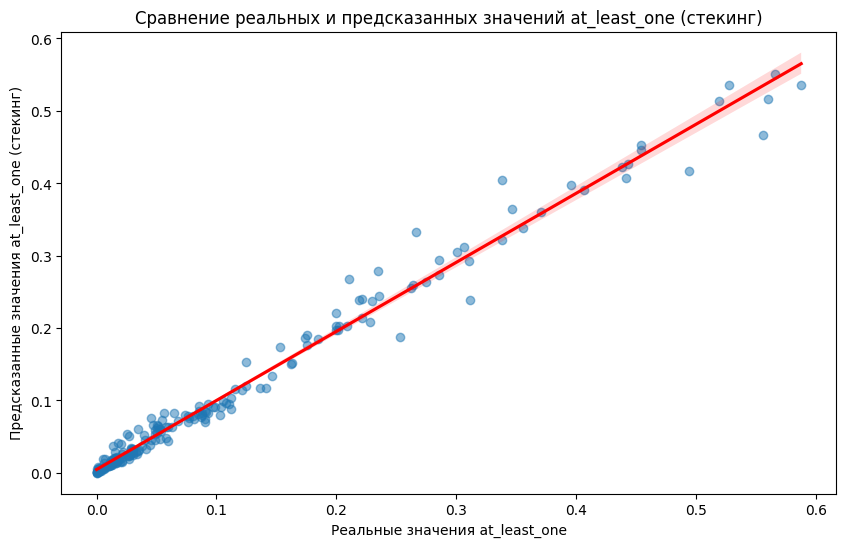

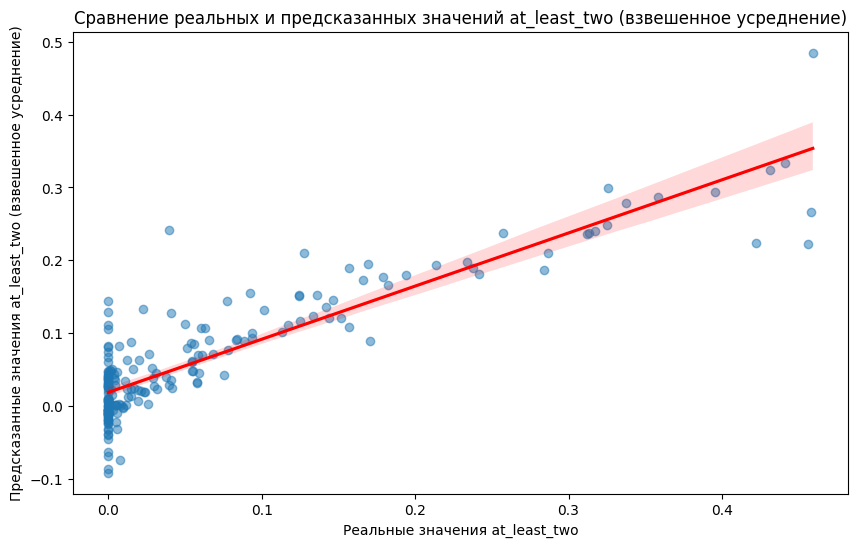

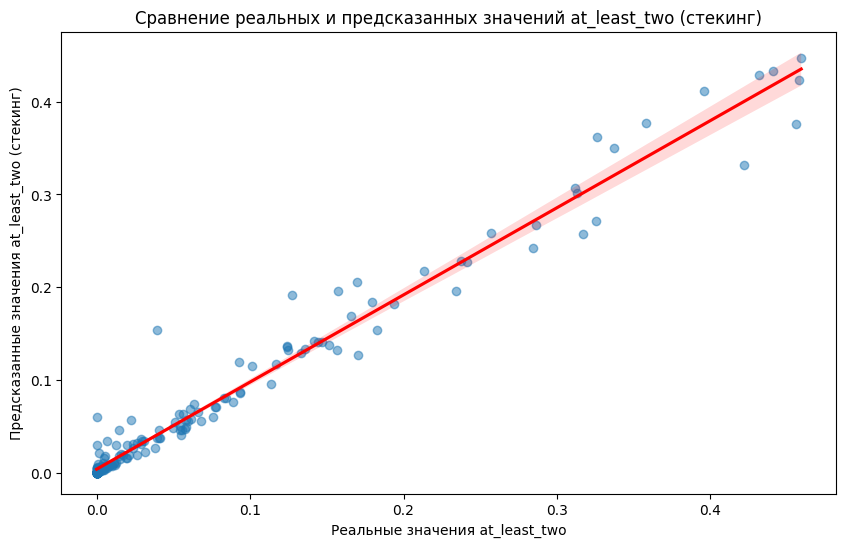

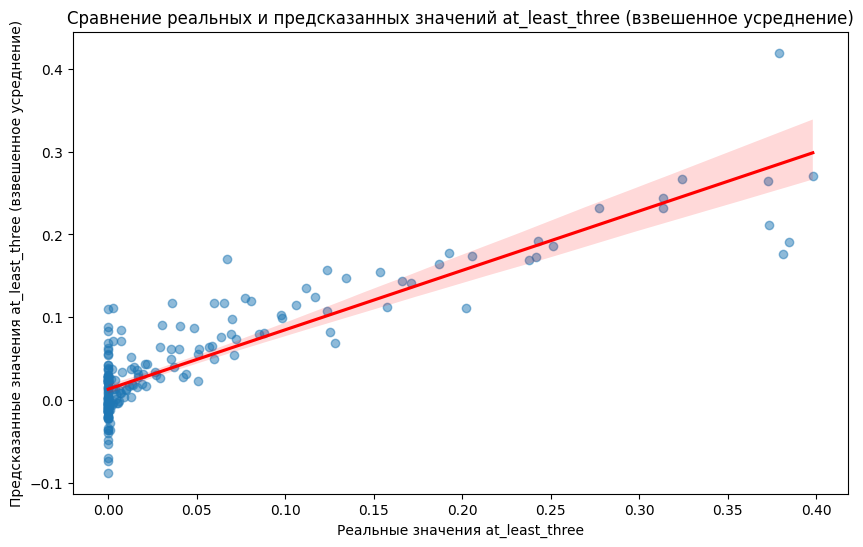

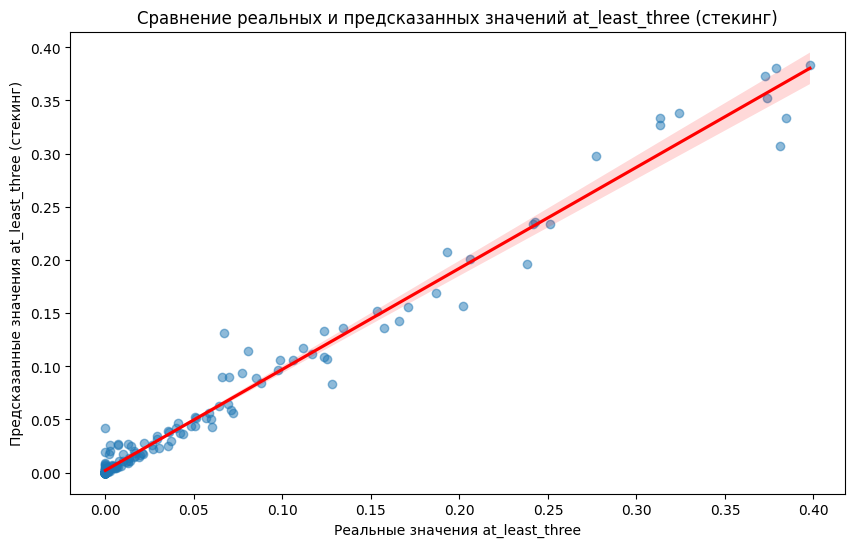

In [ ]:
for target in ['at_least_one', 'at_least_two', 'at_least_three']:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_test[target], y=ensemble_predictions_weighted[target], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(f'Реальные значения {target}')
    plt.ylabel(f'Предсказанные значения {target} (взвешенное усреднение)')
    plt.title(f'Сравнение реальных и предсказанных значений {target} (взвешенное усреднение)')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_test[target], y=ensemble_predictions_stacked[target], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(f'Реальные значения {target}')
    plt.ylabel(f'Предсказанные значения {target} (стекинг)')
    plt.title(f'Сравнение реальных и предсказанных значений {target} (стекинг)')
    plt.show()

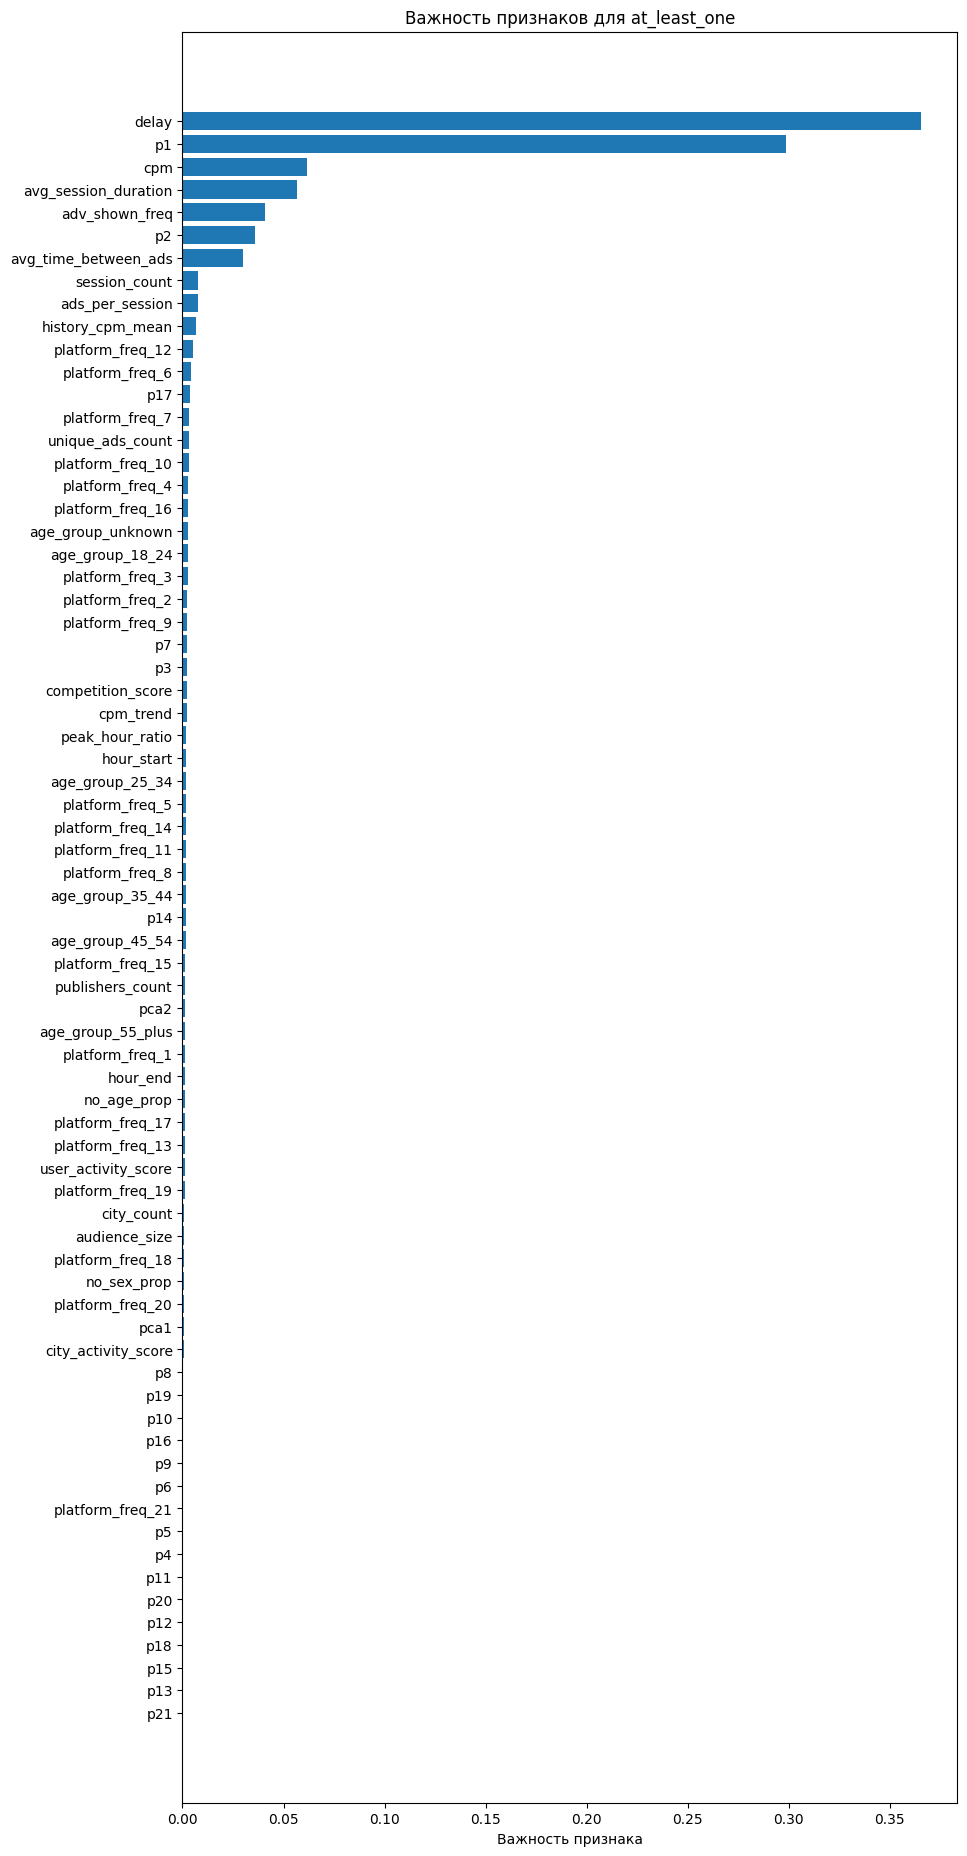

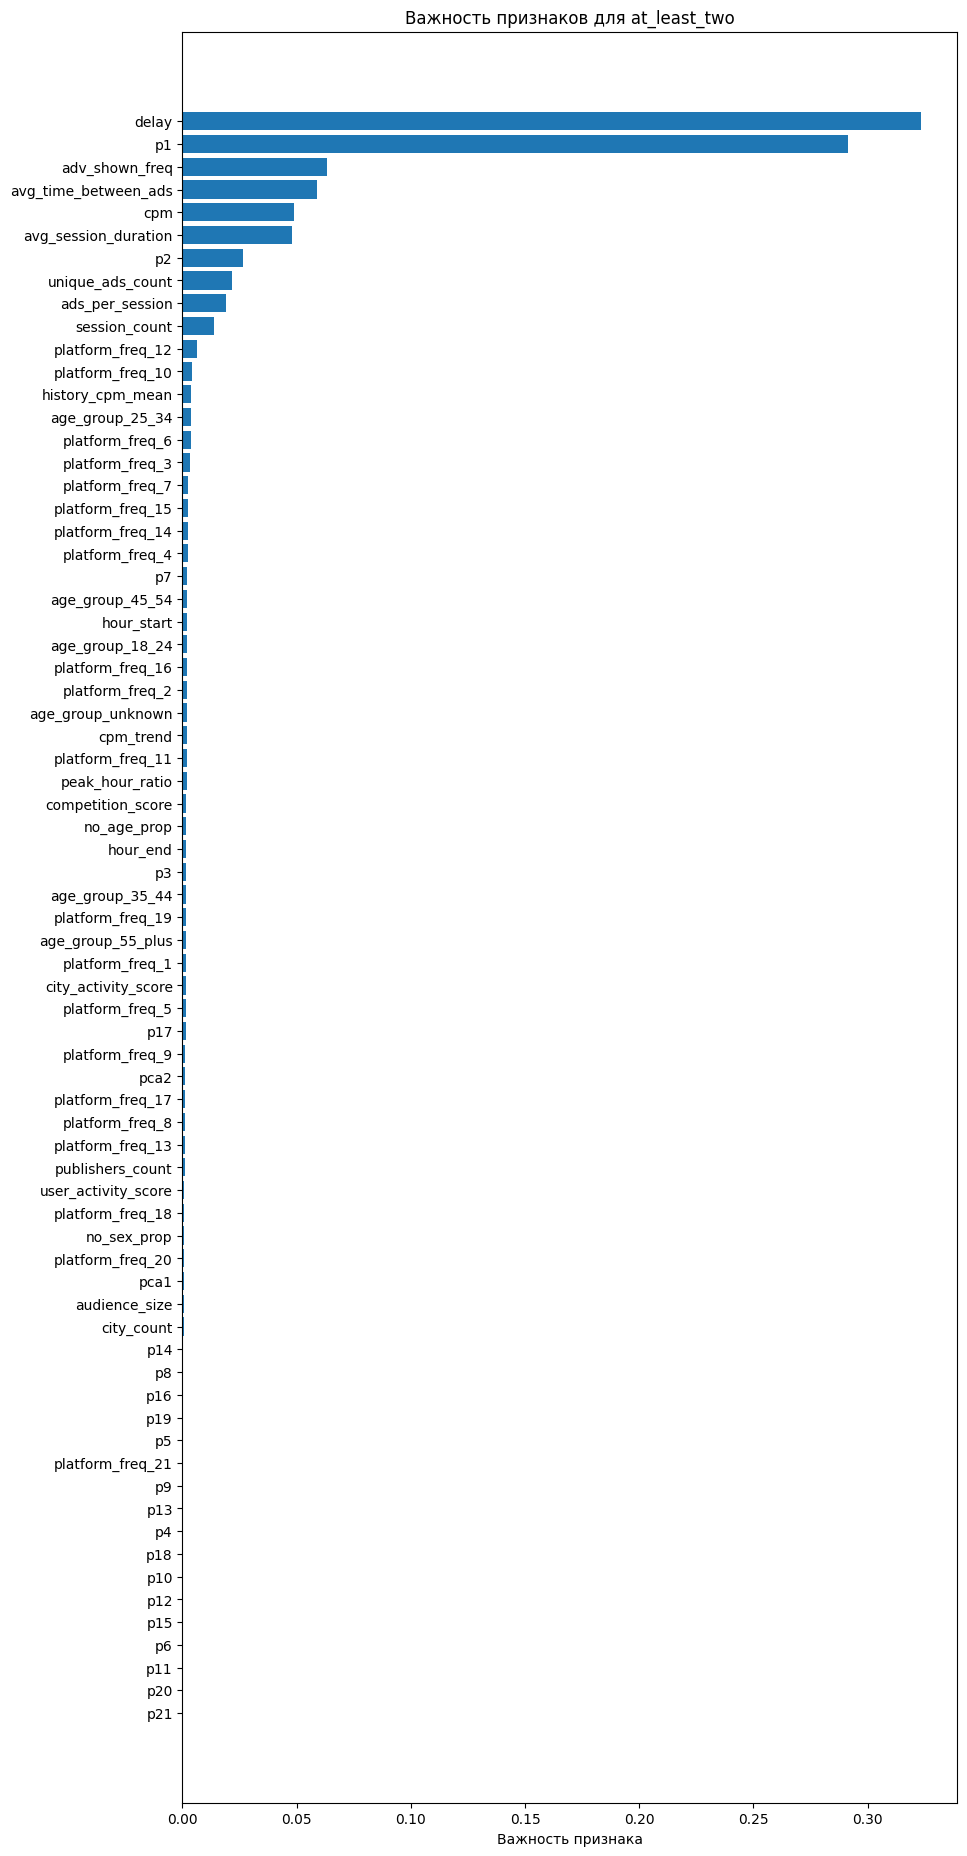

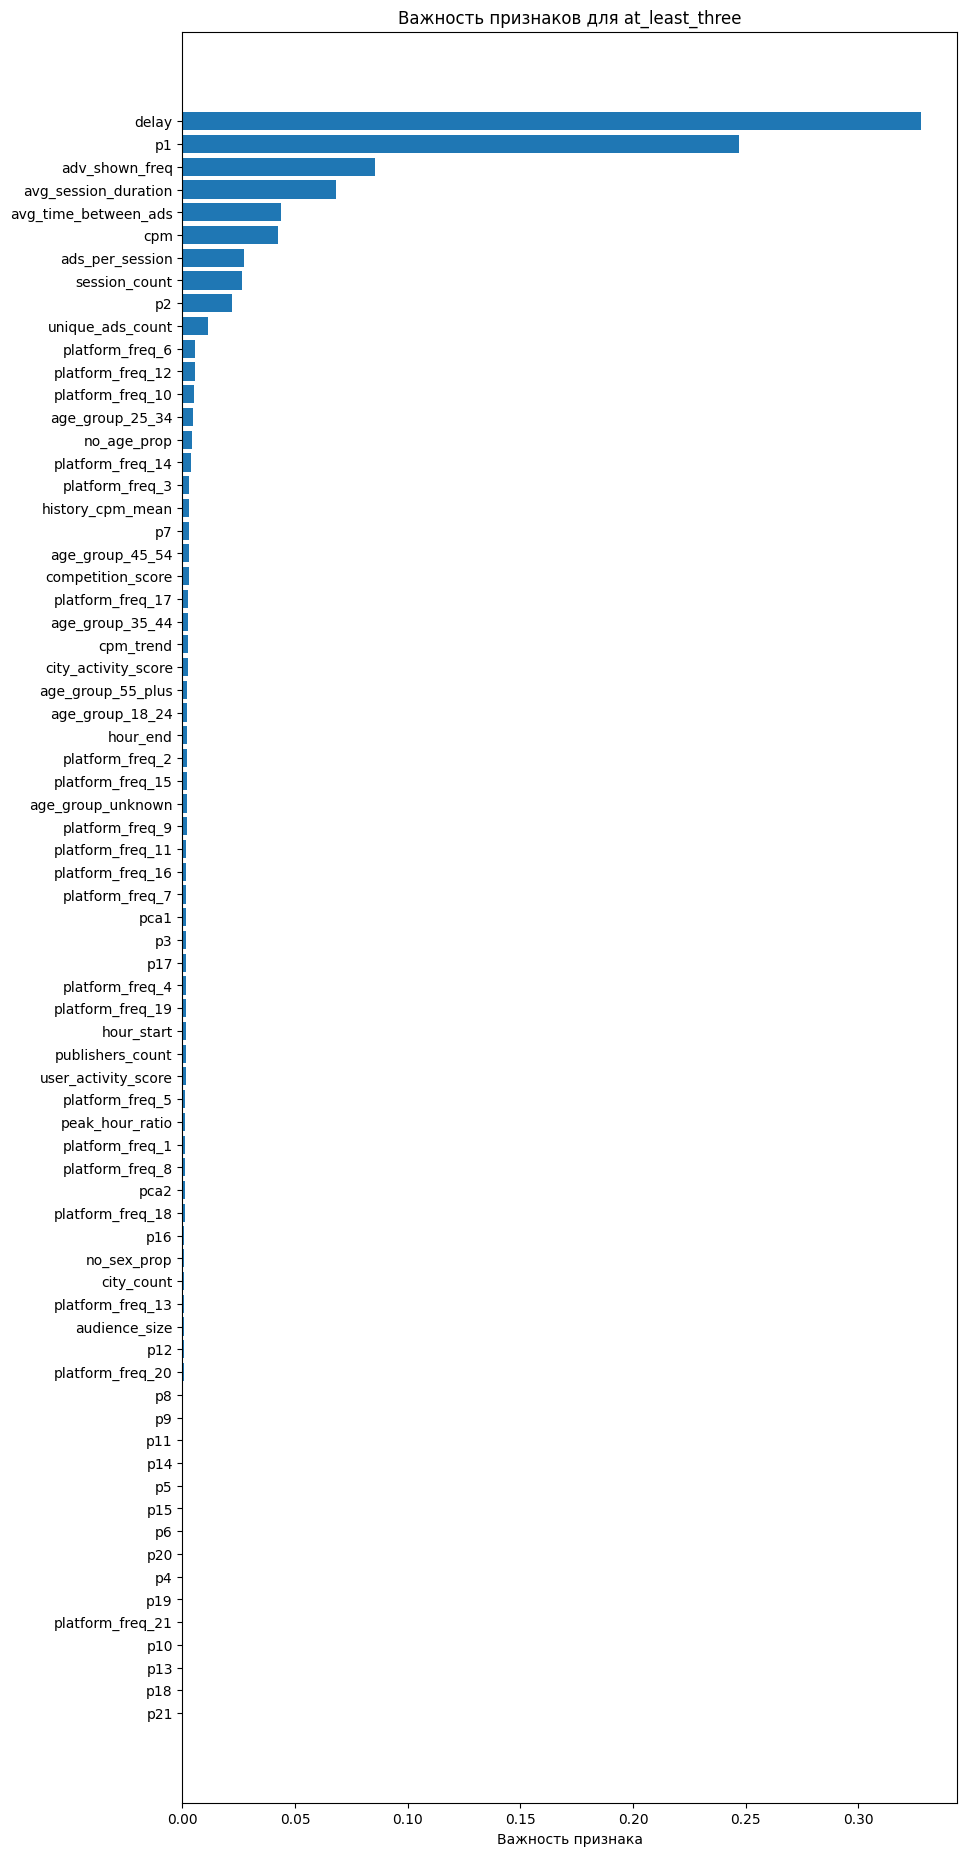

In [ ]:
def plot_feature_importance(model, target_name):
    try:
        feature_importance = model.feature_importances_
        sorted_idx = feature_importance.argsort()
        plt.figure(figsize=(10, len(X.columns) // 3))
        plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
        plt.xlabel('Важность признака')
        plt.title(f'Важность признаков для {target_name}')
        plt.show()
    except AttributeError:  # Handle models without feature_importances_
        print(f"Модель {model.__class__.__name__} не имеет атрибута feature_importances_")

for target in ['at_least_one', 'at_least_two', 'at_least_three']:
    for model_name in ['rf']:
        model = models[target][model_name]
        plot_feature_importance(model, target)